# Quantum Phase Estimation

Quantum Phase Estimation is an algorithm which estimates the phase of the eigenvalue of an unitary operator. The unitary operator has the eigenvalues of the form $e^{2\pi i \theta}$ and the eigenvectors which form an orthonormal basis.
$$U\vert\psi\rangle = e^{2\pi i\theta}\vert\psi\rangle$$
Where $e^{2\pi i\theta}$ is the eigenvalue and $\vert\psi\rangle$ is the eigenvector of the unitary operator U. QPE is used to extract this $\theta$ from the above expression, given that we have the ability to prepare $\vert\psi\rangle$. All the eigenvalues of U has a norm of 1 (since it is unitary).

A general circuit that impliment QPT is

![title](./a.png)

## Mathematical foundation

Steps in which above circuit operates

###  1. Setup:
We have two set of qubit registers, one is counting register containing n qubits, which store the value $2^n\theta$ and other is $\vert\psi\rangle$.
$$\vert\psi_0\rangle = \vert 0 \rangle^{\otimes n } \vert\psi\rangle$$

### 2. Superposition:
Now apply a n-bit Hadamard gate ($H^{\otimes n}$) on the n-bit counting register.
$$ \vert\psi_1\rangle = \frac{1}{2^{\frac{n}{2}}} (\vert 0 \rangle+\vert 1 \rangle)^{\otimes n}\vert\psi\rangle$$

### 3. Controlled Unitary operations: 
Now we need to apply $C-U^{2^j}$ operations on the target register $\vert\psi\rangle$. Since U is an unitary operator, this means:
$$U^{2^j}\vert\psi\rangle = U^{2^j-1}U\vert\psi\rangle = U^{2^j-1}e^{2\pi i\theta}\vert\psi\rangle = ... = e^{2\pi i2^j\theta}\vert\psi\rangle$$

After applying all the n $C-U^{2^j}$ operations with $0\leq j \leq n-1$:
$$\vert\psi_2\rangle =  \frac{1}{2^{\frac{n}{2}}} \left(\vert 0 \rangle + e^{2\pi i2^{n-1}\theta} \vert 1 \rangle \right)\otimes ... \otimes \left(\vert 0 \rangle + e^{2\pi i2^{1}\theta} \vert 1 \rangle \right)\otimes \left(\vert 0 \rangle + e^{2\pi i2^{0}\theta} \vert 1 \rangle \right)\otimes \vert\psi\rangle$$

or,
$$\vert\psi_2\rangle =  \frac{1}{2^{\frac{n}{2}}} \sum_{j=0}^{n-1} e^{2\pi i2^j\theta}\vert j\rangle\otimes\vert\psi\rangle $$

### 4. Inverse Fourier Transform

Notice that the above expression is exactly simillar to the expression for QFT, if we replace $2^{n}\theta$ by $x$. Therefore, to find the state $\vert2^{n}\theta\rangle$, lets apply inverse Fourier transform on the target register.

$\vert\psi_3\rangle=  \frac{1}{2^{\frac{n}{2}}} \sum_{j=0}^{n-1} e^{2\pi i2^j\theta}\vert j\rangle\otimes\vert\psi\rangle \xrightarrow{\mathcal{QFT}_n^{-1}} \frac{1}{2^n} \sum_{x=0}^{n-1}\sum_{j=0}^{n-1} e^{\frac{-2\pi i2^j}{2^n}(x-2^n\theta)}\vert x\rangle\otimes\vert\psi\rangle $

### 5. Measurement:
The above expression peaks near $x = 2^n\theta.$ Measuring in the computational basis gives the phase in counting register with high probability, in case  when $2^n\theta$ is integer:
$$\vert\psi_4\rangle = \vert \pi2^n\theta\rangle\otimes\vert\psi\rangle$$
When $2^n\theta$ is not integer, the above expression still peaks near $x = 2^n\theta$, with probability better than $4/\pi^2$.

In [38]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-07-01 15:03:30,252: Credentials are already in use. The existing account in the session will be replaced.


## Creating the circuit for T-gate

Let's create a circuit which estimate the phase of T-gate. Where T-gate is

$$T\vert 1 \rangle =
\begin{bmatrix}
1 & 0 \\
0 & e^\frac{i\pi}{4} \\
\end{bmatrix}
\begin{bmatrix}
0 \\
1 \\
\end{bmatrix}
= e^\frac{i\pi}{4} \vert 1 \rangle $$

Since QPE gives us theta from
$$ T\vert 1 \rangle = e^{2\pi i\theta} \vert 1 \rangle $$
So, in this case we expect to find:
$$ \theta = \frac{1}{8}$$

In [17]:
import numpy as np
pi = np.pi

Let's set up a circuit with four qubits(3 counting qubits and fourth as the eigenstate of T-gate), apply x-gate to initiate $\vert\psi\rangle$ and h-gate on counting qubits.

In [ ]:
qc = QuantumCircuit(4,3)

qc.x(3)

for i in range(3):
    qc.h(i)

qc.draw()

Next we apply controlled-U gate on above gate.

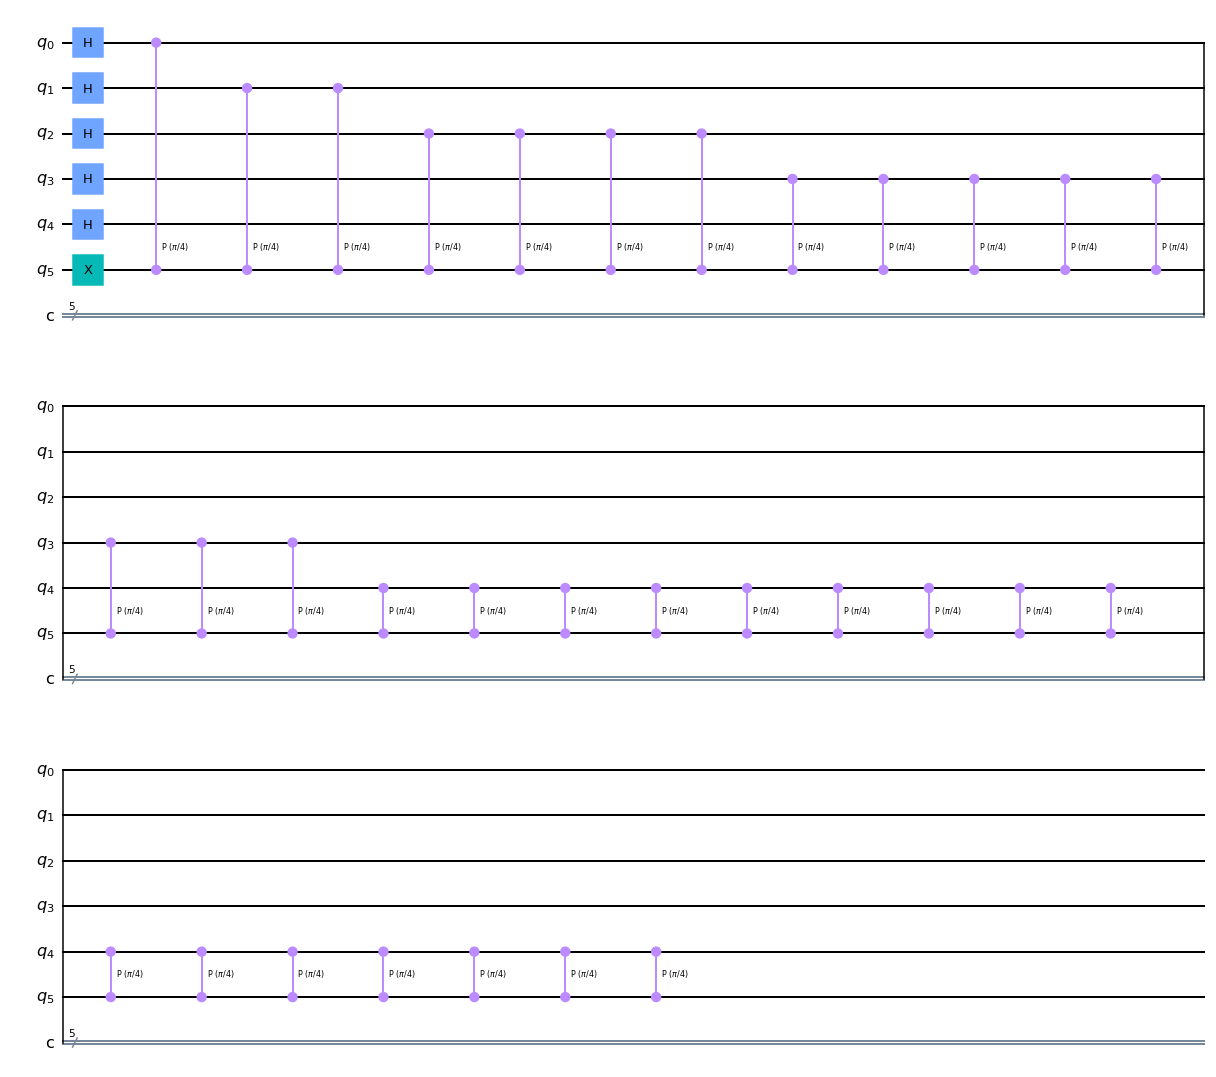

In [104]:
rep = 1
for c_q in range(5):
    for i in range(rep):
        qc.cp(pi/4, c_q, 5)
    rep *= 2
qc.draw()
    

Next we apply the Inverse Fourier Transformation on counting qubits. Let's define a for inverse QFT.

In [110]:
def qft_inv(circuit, n):
    k = n-1
    for qbt in range(n//2):
        circuit.swap(qbt, n-qbt-1)
    for j in range(n):
        qc.cp(-pi/2**(n-j), j, n)
        qc.h(j)

Now applying it on above circuit:

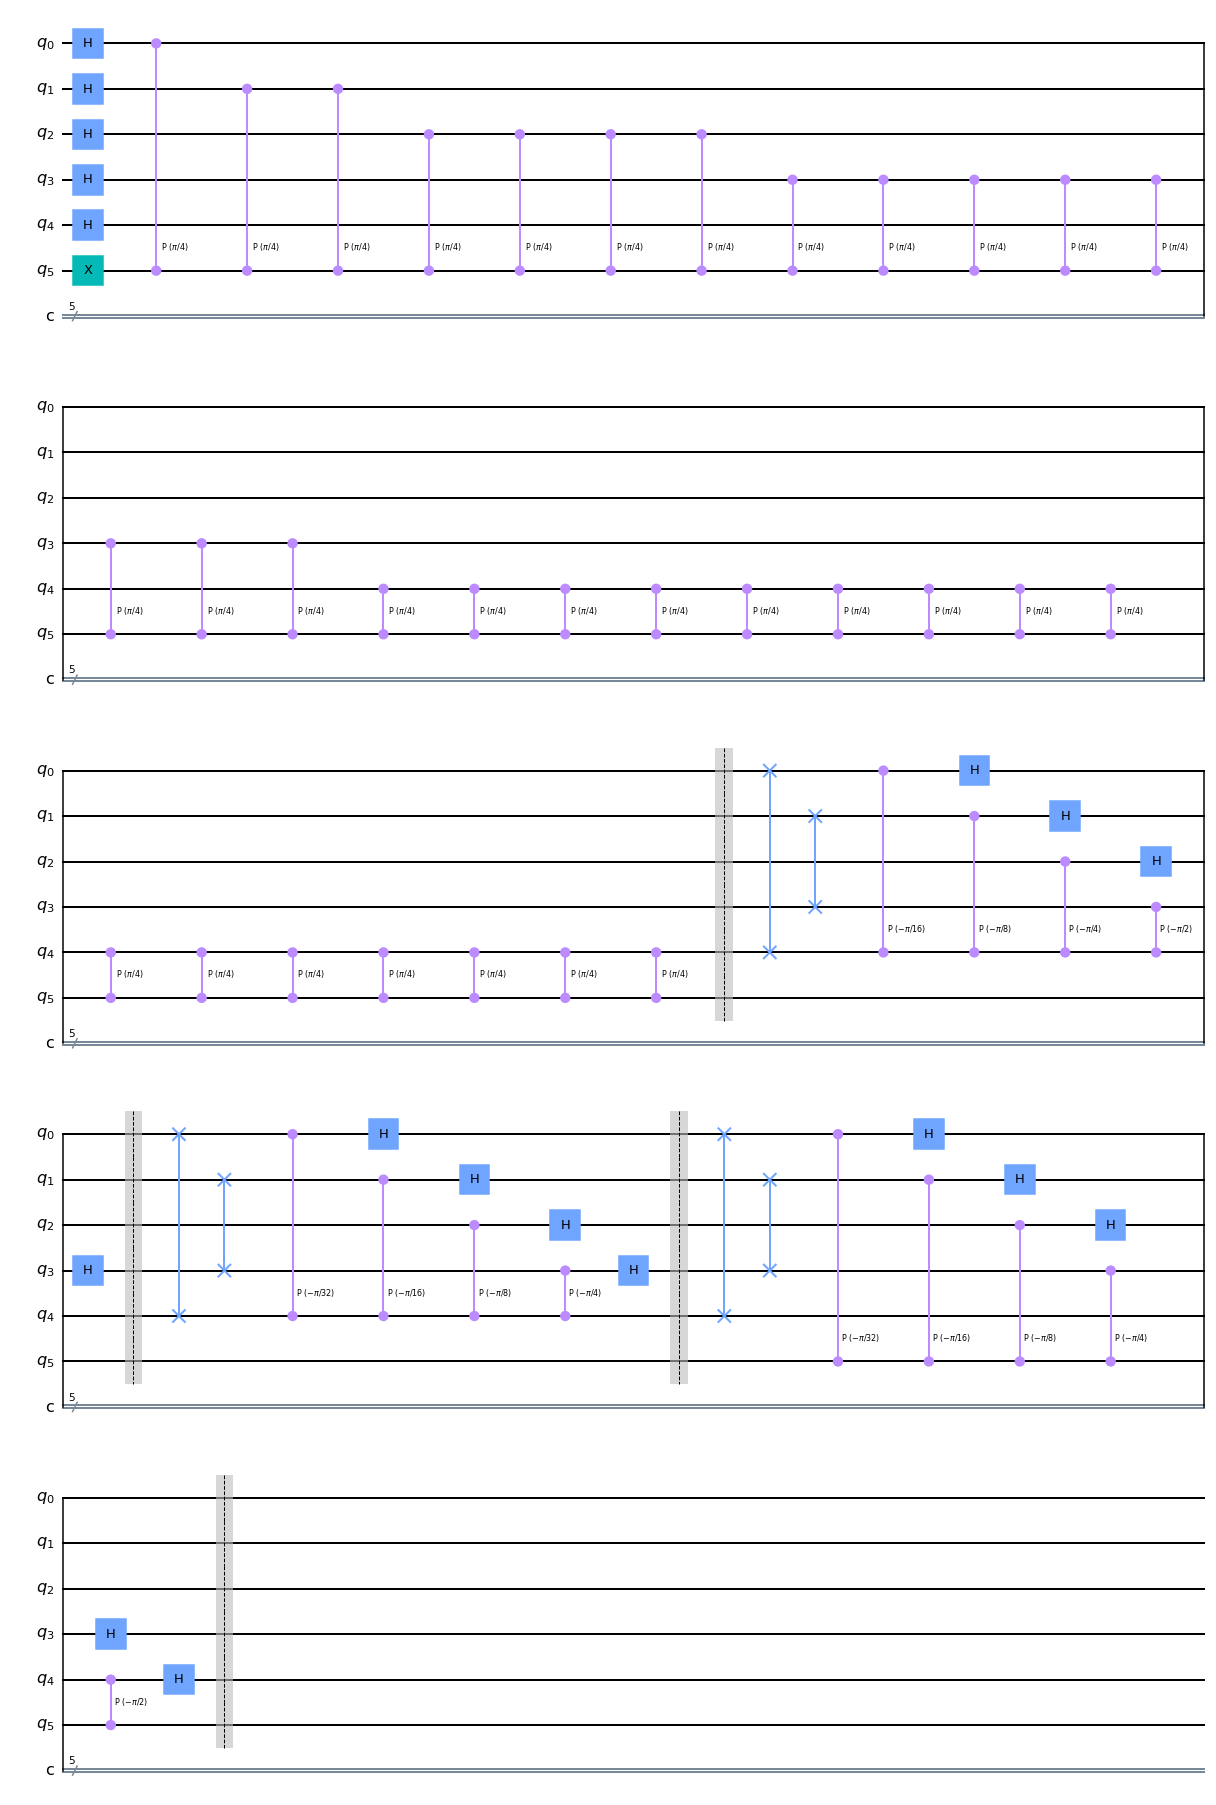

In [111]:
qc.barrier()
qft_inv(qc, 5)
qc.barrier()

qc.draw()

Now let's measure the counting register:

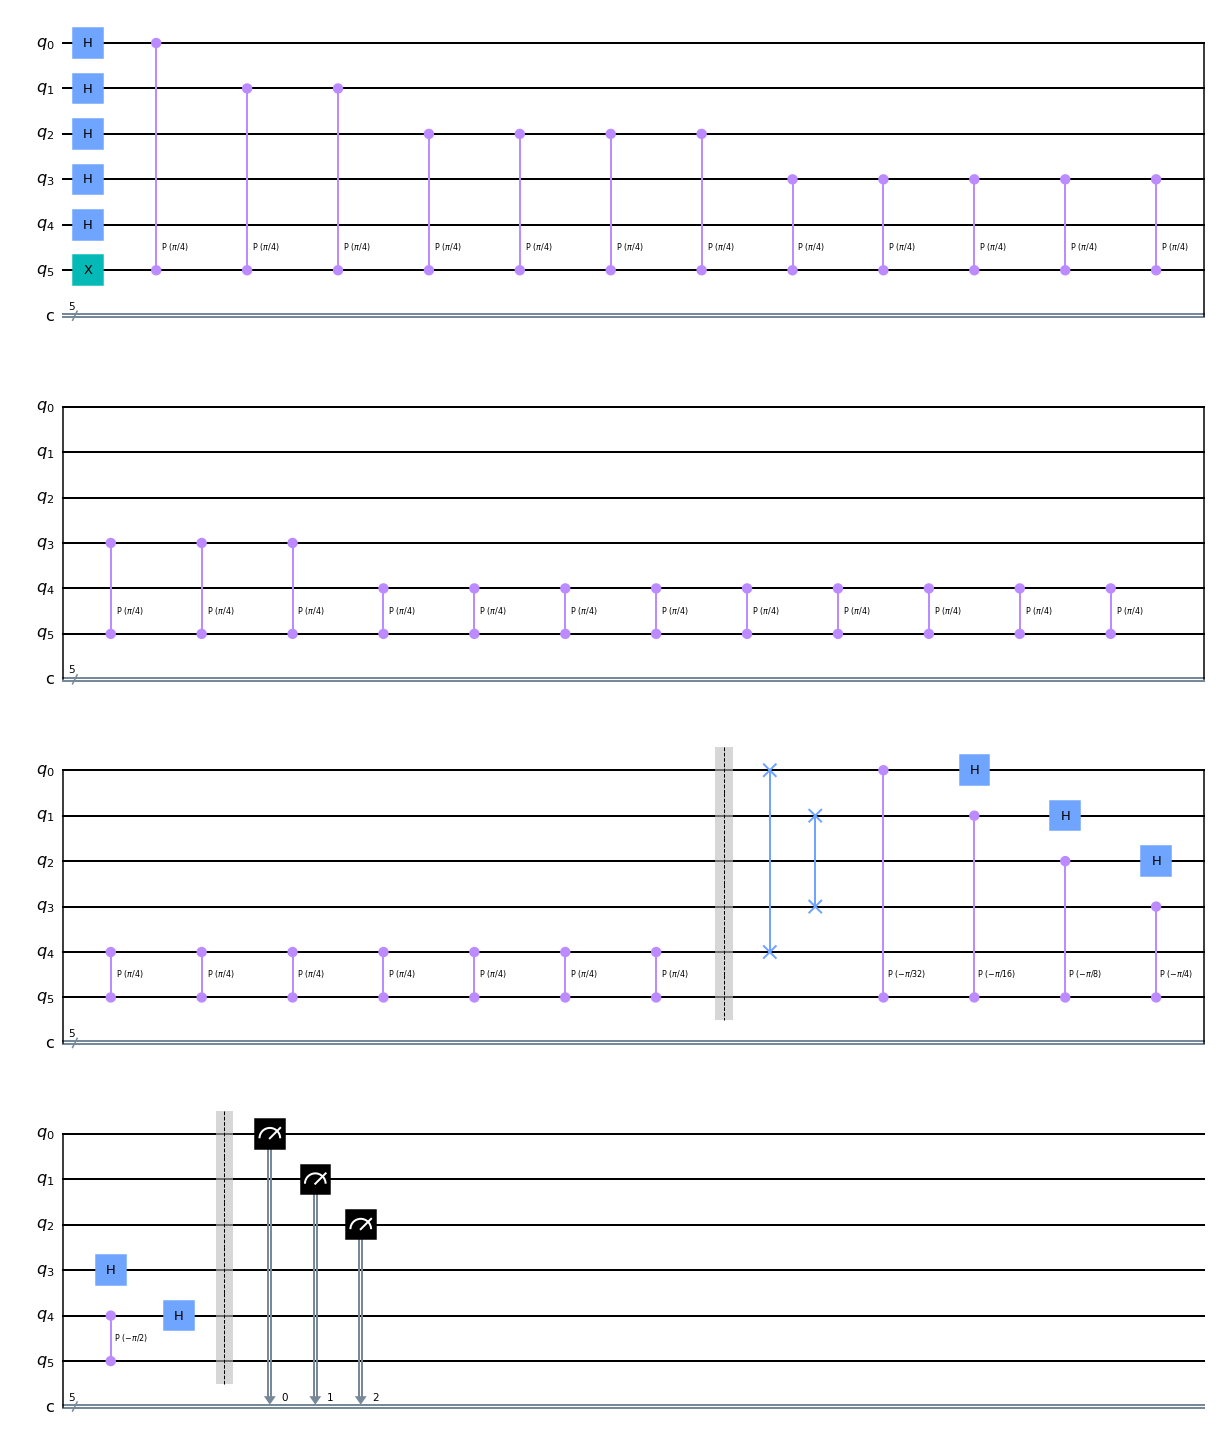

In [74]:
for n in range(3):
    qc.measure(n,n)

qc.draw()

Now simulating the circuit:

{'00111': 1, '00010': 2, '00110': 36, '00000': 168, '00100': 3832, '00101': 9}


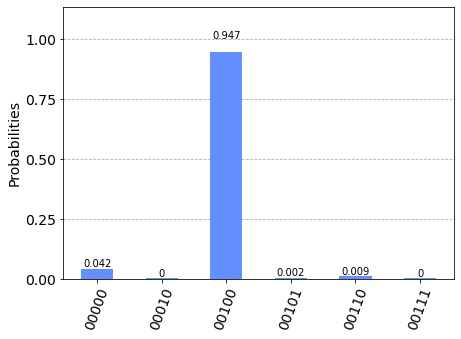

In [76]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc, shots = 4048)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

print(answer)
plot_histogram(answer)

Our result from measurment is `001`, which is is equivalent to 1 in the decimal. To find the theta we need to divide it by $2^n$, where n is the number of qubit.

$$ \theta = \frac{1}{2^3} = 1/8$$

Now to find the phase we need to find it by $2\pi$. So, $$T_{Phase} = \frac{2\pi}{8} = \frac{\pi}{4}$$
